In [5]:
import os
import cv2
import matplotlib.pyplot as plt
from face_detector.detect_engine import FaceDetectionEngine

/home/nikolay/.pyenv/versions/3.7.3/envs/main/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/nikolay/workspace/MERLIN & CO/face-detector-s3fd/face_detector/iou.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [16]:
detector = FaceDetectionEngine(weights_path="face_detector/s3fd_convert.pth")

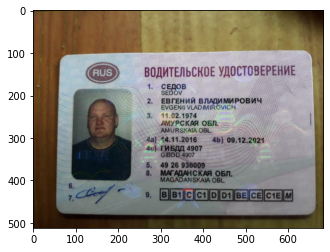

In [23]:
img = cv2.imread("/home/nikolay/Documents/MUST/DS Drivers Faces-20200704T025843Z-001/DS Drivers Faces/Копии документов/242/ву 1.jpg")[:,:, ::-1]

def resize_by_height(img, new_height):
    '''
    Input: image, new_height
    Returns: image with new height and scaled width
    '''
    height, width = img.shape[:2]
    resize_multiple = new_height / height
    img = cv2.resize(img, None, fx=resize_multiple, fy=resize_multiple, interpolation=cv2.INTER_AREA)
    return img

img = resize_by_height(img, 512)

plt.imshow(img)
plt.show()

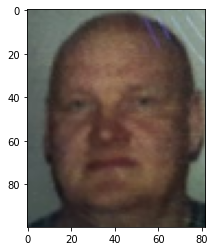

In [24]:
preds = detector.predict(img, dilate_bbox=True)
crops = [detector.crop(img, i) for i in preds]

for i in crops:
    plt.imshow(i)
    plt.show()

In [21]:
crops

[array([[[101, 114, 107],
         [100, 113, 106],
         [100, 113, 106],
         ...,
         [142, 159, 151],
         [145, 162, 154],
         [147, 164, 156]],
 
        [[103, 116, 109],
         [100, 113, 106],
         [ 99, 112, 105],
         ...,
         [142, 159, 153],
         [145, 162, 156],
         [146, 163, 157]],
 
        [[104, 117, 110],
         [101, 114, 107],
         [ 99, 112, 105],
         ...,
         [140, 157, 149],
         [144, 161, 153],
         [143, 160, 152]],
 
        ...,
 
        [[ 64,  76,  76],
         [ 57,  69,  69],
         [ 51,  63,  63],
         ...,
         [ 26,  34,  36],
         [ 34,  42,  45],
         [ 39,  49,  51]],
 
        [[ 53,  64,  66],
         [ 43,  54,  56],
         [ 35,  46,  48],
         ...,
         [ 21,  29,  31],
         [ 33,  41,  44],
         [ 38,  48,  50]],
 
        [[ 41,  52,  54],
         [ 31,  42,  44],
         [ 25,  36,  38],
         ...,
         [ 25,  35,  36],
  